In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt

In [28]:
data_df = pd.read_csv("data_files/associations.csv")
data_df.head()

,vVirusNameCorrected,hHostNameFinal,WildDomInReference,DetectionMethod,DetectionQuality,Reference
0,Andes_virus,Abrothrix_longipilis,wild,PCR,2.0,Medina et al. 2009
1,Andes_virus,Abrothrix_olivaceus,wild,Antibodies,0.0,Sosa-Estani et al. 2002
2,Andes_virus,Abrothrix_sanborni,wild,Antibodies,0.0,Padula et al. 2004
3,African_horse_sickness_virus,Acinonyx_jubatus,wild,bcELISA,0.0,Alexander et al. 1995
4,Bluetongue_virus,Acinonyx_jubatus,wild,Antibodies,0.0,Alexander et al. 1994


In [29]:
virus_df = pd.read_csv("data_files/viruses.csv")
virus_df.head()

,vVirusNameCorrected,vOrder,vFamily,vSubfamily,vGenus,vIsTypeSpecies,vICTVnumber,ReverseZoonoses,IsHoSa,IsHoSa.stringent,...,vWOKcites,vPubMedCites,vCytoReplicTF,vSegmentedTF,vVectorYNna,vSSoDS,vDNAoRNA,vEnvelope,IsZoonotic,IsZoonotic.stringent
0,Adelaide_River_virus,Mononegavirales,Rhabdoviridae,NaN,Ephemerovirus,0,NaN,0,0,0,...,6,7,True,False,Y,SS,RNA,enveloped,0,0
1,Adeno-associated_virus-1,Unassigned,Parvoviridae,Parvovirinae,Dependovirus,0,00.050.1.03.002.,0,1,0,...,54,14,False,False,NaN,SS,DNA,non-enveloped,1,0
2,Adeno-associated_virus-2,Unassigned,Parvoviridae,Parvovirinae,Dependovirus,1,00.050.1.03.001.,1,1,1,...,573,381,False,False,NaN,SS,DNA,non-enveloped,1,0
3,Adeno-associated_virus-5,Unassigned,Parvoviridae,Parvovirinae,Dependovirus,0,NaN,0,1,1,...,4,4,False,False,NaN,SS,DNA,non-enveloped,0,0
4,African_green_monkey_polyomavirus,Unassigned,Polyomaviridae,NaN,Polyomavirus,NaN,NaN,0,1,0,...,1,0,True,False,N,DS,DNA,non-enveloped,1,0


In [30]:
host_df = pd.read_csv('data_files/hosts.csv', 
                      header=0,
                      usecols=[0,14])
host_df['Common_names_Eng'] = host_df['Common_names_Eng'].apply(lambda x: x.split(',')[0] if not pd.isnull(x) else x)

host_df.loc[host_df['Common_names_Eng'].isnull(),
            'Common_names_Eng'] = host_df['hHostNameFinal']

host_df.head()

,hHostNameFinal,Common_names_Eng
0,Abrothrix_longipilis,Long-haired Akodont
1,Abrothrix_olivaceus,Olive Grass Mouse
2,Abrothrix_sanborni,Sanborn's Grass Mouse
3,Acinonyx_jubatus,Cheetah
4,Aepyceros_melampus,Black-faced Impala


In [31]:
data_df['DetectionQuality'] = data_df['DetectionQuality'].apply(lambda x: .1 if x == 0 else x)
data_df = data_df.dropna(subset=['DetectionQuality'])

In [32]:
data_df['DetectionQuality'].isnull().value_counts()

False    2804
Name: DetectionQuality, dtype: int64

In [33]:
host_map = {k:v for k,v in zip(host_df['hHostNameFinal'], host_df['Common_names_Eng'])}

In [34]:
data_df['HostName'] = data_df['hHostNameFinal'].map(host_map)

Check for nulls

In [35]:
data_df['HostName'].isnull().value_counts()

False    2804
Name: HostName, dtype: int64

In [36]:
data_unstack = data_df.groupby(['vVirusNameCorrected',
                                 'HostName'])[['DetectionQuality']].sum().unstack().fillna(0)

data_unstack.columns = list(data_unstack.columns.get_level_values(1))
data_unstack.index = list(data_unstack.index.get_level_values(0))

data_unstack.head(5)

,Aardwolf,Aba Roundleaf Bat,Abruzzo Chamois,Admiralty Flying-fox,African Buffalo,African Caracal,African Elephant,African Grass Rat,African Lion,African Marsh Rat,...,Yellow Ground Squirrel,Yellow Mongoose,Yellow Pygmy Rice Rat,Yellow-bellied Marmot,Yellow-bellied Pouched Bat,Yellow-necked Field Mouse,Yellow-pine Chipmunk,Yellow-spotted Brush-furred Rat,Yellowish Myotis,Yuma Myotis
Adelaide_River_virus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adeno-associated_virus-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adeno-associated_virus-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adeno-associated_virus-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
African_green_monkey_polyomavirus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
B=nx.Graph()

B.add_nodes_from(data_df['vVirusNameCorrected'],
                 bipartite=0)

B.add_nodes_from(data_df['HostName'],
                 bipartite=1)

B.add_weighted_edges_from(
    [(row['vVirusNameCorrected'], 
      row['HostName'],
      row['DetectionQuality']) for idx, row in data_df.iterrows()])

domain_map = {k:v for k,v in zip(data_df['HostName'], data_df['WildDomInReference'])}
genus_map = {k:v for k,v in zip(virus_df['vVirusNameCorrected'], virus_df['vGenus'])}

for node in list(B.nodes):
    try:
        B.nodes[node]['domain'] = domain_map[node]
    except KeyError:
        B.nodes[node]['domain'] = 'None'
    try:
        B.nodes[node]['genus'] = genus_map[node]
    except KeyError:
        B.nodes[node]['genus'] = 'None'

![title](data_files/all.png)

In [38]:
virus = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
host = set(B) - virus

# project bipartite graph onto virus nodes keeping number of co-occurences, weighted degree
B_virus = nx.bipartite.weighted_projected_graph(B, virus)

# project bipartite graph onto host nodes keeping number of co-occurences, weighted degree
B_host = nx.bipartite.weighted_projected_graph(B, host, ratio=False)

In [39]:
list(B_host.degree())[:5]

[('Brown Lemming', 0),
 ('Highveld Gerbil', 40),
 ('Forest Giant Pouched Rat', 8),
 ('Long-eared Myotis', 139),
 ('Lion-tailed Macaque', 43)]

In [40]:
#Code from textbook Social Network Analysis for Startups by Maksim Tsvetovat and Alexander Kouznetsov
def trim_edges(g, weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,weight=edata['weight'])
    return g2

def island_method(g, iterations = 5):
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g, threshold)] for threshold in range(mn,mx,step)]

def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

In [41]:
# virus islands analysis
cc = list(B_virus.subgraph(c) for c in nx.connected_components(B_virus))[0]
islands = island_method(cc)

for i in islands:
    print(i[0], len(list(nx.degree(i[1]))), len(list(connected_component_subgraphs(i[1]))))

1 303 3
6 60 3
11 21 2
16 8 2
21 6 2
26 2 1


### Color-coded Virus Analysis

Colors indicate whether virus is a coronavirus or not

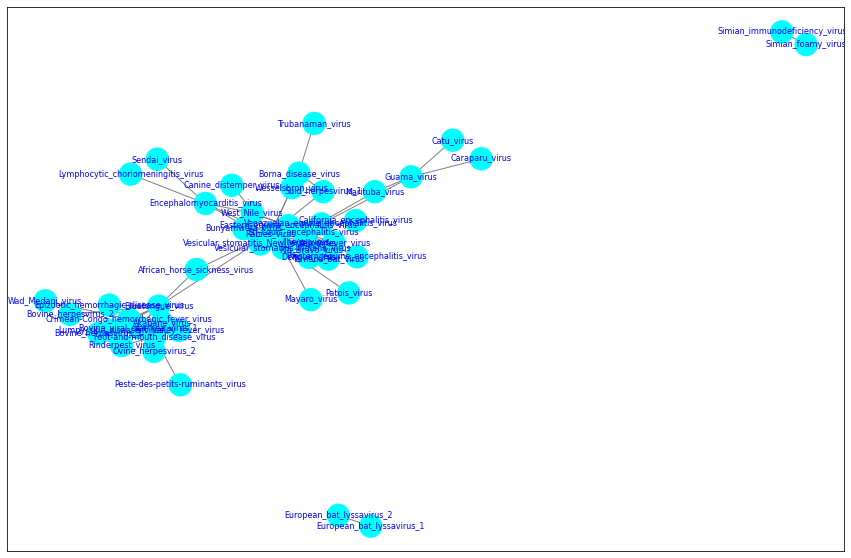

In [42]:
# use 11 for the threshold
v11 = trim_edges(B_virus, 7)

genus_color = []
for node in list(v11.nodes):
    v11.nodes[node]['genus'] = genus_map[node]
    if genus_map[node] == 'Coronavirus':
        genus_color.append('lightblue')
    else: 
        genus_color.append('cyan')


plt.figure(figsize=(15,10))
pos = nx.spring_layout(v11, iterations = 20)
nx.draw_networkx_nodes(v11, pos, node_color=genus_color, node_size=500)
nx.draw_networkx_edges(v11, pos,  edge_color='gray')
nx.draw_networkx_labels(v11, pos, font_size=8, font_color ='blue')

plt.show()

It looks like none of the most common virus clusters contain a coronavirus

In [52]:
# hosts islands analysis
cc = list(B_host.subgraph(c) for c in nx.connected_components(B_host))[0]
islands = island_method(cc)

for i in islands:
    print(i[0], len(list(nx.degree(i[1]))), len(list(connected_component_subgraphs(i[1]))))

ValueError: min() arg is an empty sequence

### Color-coded Island Method

In [53]:
# use 7 for the threshold
h11 = trim_edges(B_host, 7)

wild_domestic_color = []
bat_non_bat_color = []
for node in list(h11.nodes):
    h11.nodes[node]['domain'] = domain_map[node]
    if domain_map[node] == 'wild':
        wild_domestic_color.append('lightblue')
    else:
        wild_domestic_color.append('cyan')
    if ('Bat'or 'Flying Fox') in node:
        bat_non_bat_color.append('lightblue')
    else:
        bat_non_bat_color.append('cyan')

### Infections Grouped by Wild Animals vs Domestic Animals

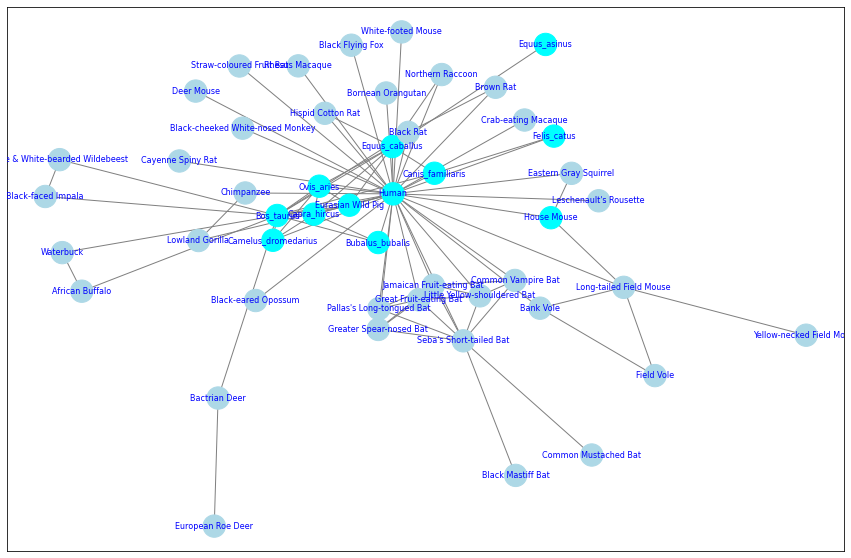

In [54]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(h11, iterations = 20)
nx.draw_networkx_nodes(h11, 
                       pos, 
                       node_color=wild_domestic_color, 
                       node_size=500)
nx.draw_networkx_edges(h11, pos,  edge_color=['gray'])
nx.draw_networkx_labels(h11, pos, font_size=8, font_color ='blue')

plt.show()

### Infections from Bats vs Other Animals

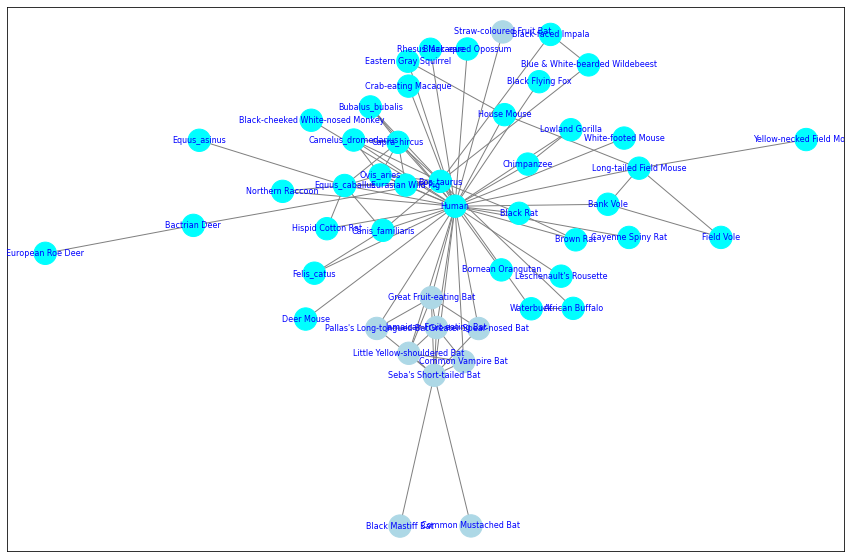

In [48]:
plt.figure(figsize=(15,10))
pos = nx.spring_layout(h11, iterations = 20)
nx.draw_networkx_nodes(h11, 
                       pos, 
                       node_color=bat_non_bat_color, 
                       node_size=500)
nx.draw_networkx_edges(h11, pos,  edge_color=['gray'])
nx.draw_networkx_labels(h11, pos, font_size=8, font_color ='blue')

plt.show()

In [49]:
coronavirus_filter = [(u,v) for u,v in B.edges if B.nodes[u]['genus'] == 'Coronavirus']
C = B.edge_subgraph(coronavirus_filter)

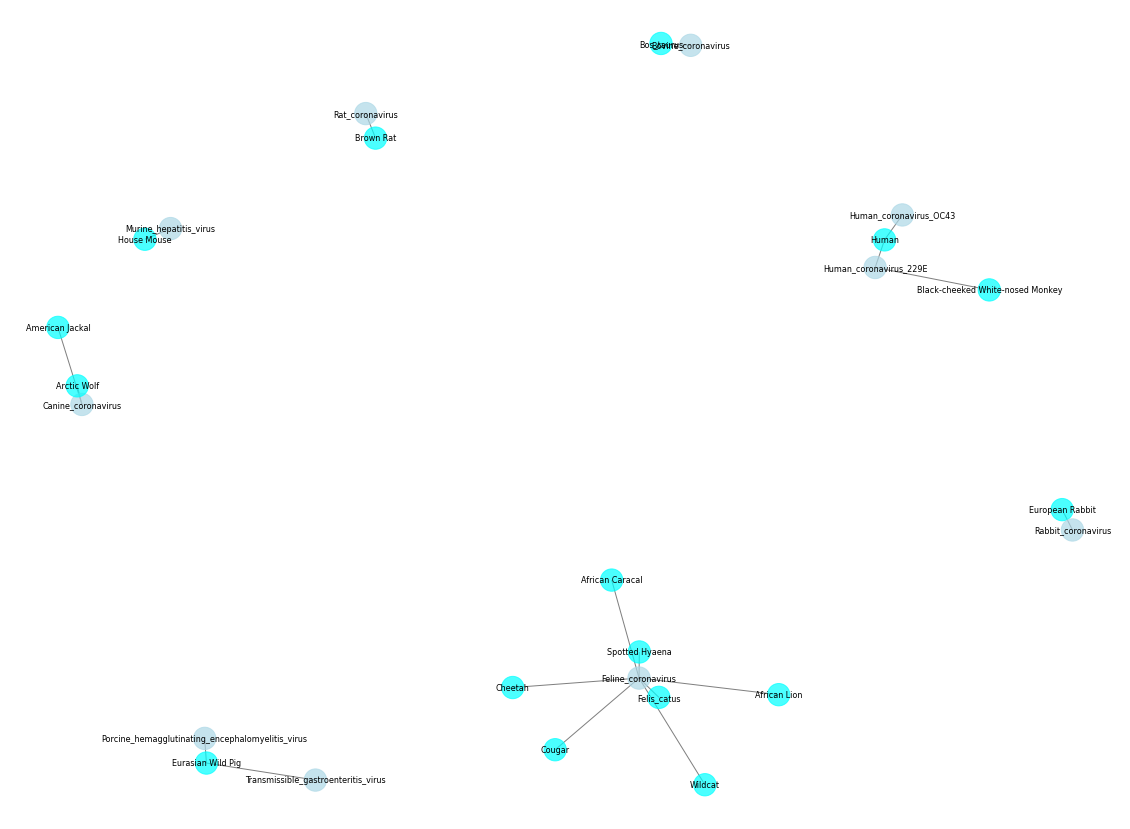

In [50]:
plt.figure(figsize=(20,15))
pos = nx.spring_layout(C)
plt.axis('off')

animal_virus_color = []
for node in list(C.nodes):
    if C.nodes[node]['genus'] == 'Coronavirus':
        animal_virus_color.append('lightblue')
    else:
        animal_virus_color.append('cyan')

nx.draw_networkx_nodes(C, 
                       pos,
                       node_color=animal_virus_color, 
                       alpha=0.7, 
                       node_size=500)

nx.draw_networkx_edges(C, 
                       pos, 
                       edge_color='gray')

nx.draw_networkx_labels(C, 
                        pos, 
                        font_size=8,
                        font_weight=10);

In [51]:
nx.write_gml(B, 'B.gml')
nx.write_gml(h11, 'h11.gml')
nx.write_gml(C, 'C.gml')